In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd

path = '~/codedata/tpai/pre/'
trainfile = 'train.csv'
train = pd.read_csv(path + trainfile)

In [2]:
print train.shape
train.head()

(3749528, 8)


label  clickTime  conversionTime  creativeID   userID  positionID  \
0      0     170000             NaN        3089  2798058         293   
1      0     170000             NaN        1259   463234        6161   
2      0     170000             NaN        4465  1857485        7434   
3      0     170000             NaN        1004  2038823         977   
4      0     170000             NaN        1887  2015141        3688   

   connectionType  telecomsOperator  
0               1                 1  
1               1                 2  
2               4                 1  
3               1                 1  
4               1                 1

In [3]:
test = {}
def property(var, train):
    sns.distplot(train[var], kde=False)
    fig = plt.figure()
    means = train.groupby(var)['label'].mean()
    plt.scatter(x=means.index, y = means.values)
    sort_means = means.sort_values(ascending = False)
    fig = plt.figure()
    plt.scatter(x = range(0,len(sort_means)), y = sort_means.values)
    return (var, len(train[var].value_counts()), sort_means.max() - sort_means.min(), sort_means.std())

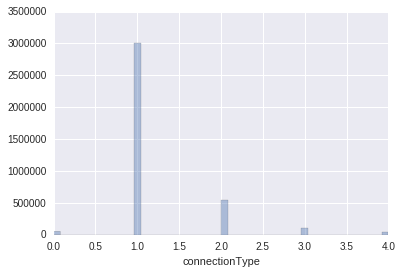

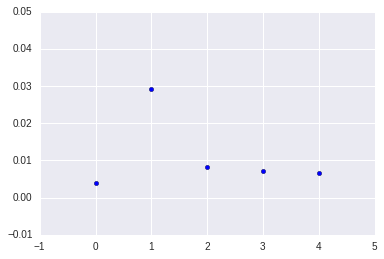

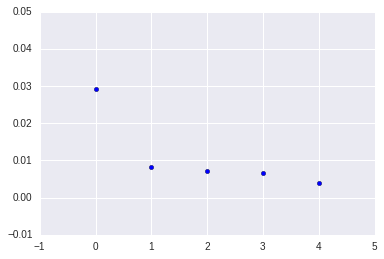

In [4]:
var = 'connectionType'
test[var] = property(var, train)

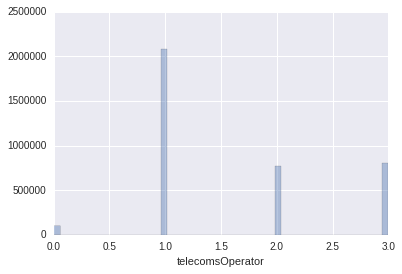

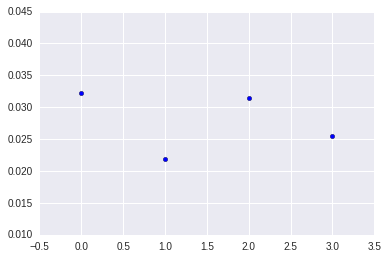

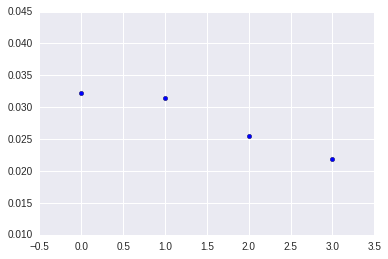

In [5]:
var = 'telecomsOperator'
test[var] = property(var, train)

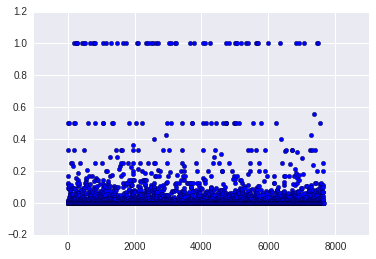

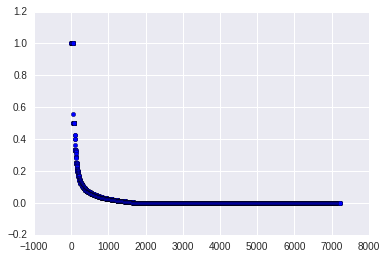

In [6]:
var = 'positionID'
test[var] = property(var, train)

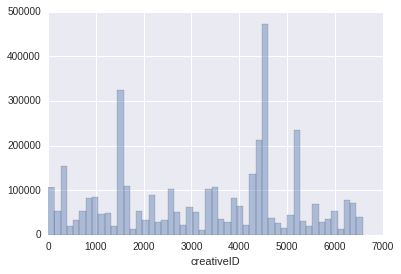

In [7]:
var = 'creativeID'
test[var] = property(var, train)

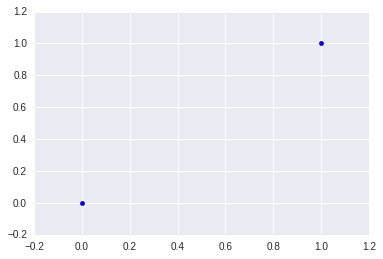

In [8]:
var = 'label'
test[var] = property(var, train)

In [9]:
# 把时间转换为以分钟为单位
def returnmin(time):
    clickT = time % 10000
    clickT = clickT.values  / 100 * 60 + clickT.values % 100
    return clickT
clickTiMin = returnmin(train['clickTime'])
converTiMin = returnmin(train['conversionTime'])
# type(clickTiMin)
train['clickTiMin'] = clickTiMin
train['converTiMin'] = converTiMin
dfTime = pd.DataFrame({'clickTiMin':clickTiMin, 'converTiMin':converTiMin})
dfTime = dfTime.fillna(0)
train['plusTime'] = dfTime['converTiMin'] - dfTime['clickTiMin']
# dfTime[dfTime['plusTime'] > 0]['plusTime'] = 0

In [10]:
v = train[train['plusTime'] > 0]
# 激活的conversionTime与clickTime的时间差
sns.distplot(v['plusTime'],kde=False)

In [11]:
# 点击时间分布
var = 'clickTiMin'
test[var] = property(var, train)

In [14]:
for (k,v) in test.items():
    print v

('positionID', 7219, 1.0, 0.097800108293958354)
('connectionType', 5, 0.025336495627940228, 0.010308483261562163)
('label', 2, 1, 0.70710678118654757)
('clickTiMin', 1440, 0.036250853630776236, 0.0048289329274051728)
('creativeID', 6315, 1.0, 0.071309827665513831)
('telecomsOperator', 4, 0.010404207972994964, 0.0049696062876111828)


In [12]:
train['label'].value_counts()

0    3656266
1      93262
Name: label, dtype: int64

In [13]:
corrmat =  train.corr()
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, vmax=.8, square=True)
corrmat

label  clickTime  conversionTime  creativeID    userID  \
label             1.000000  -0.004664             NaN   -0.016914 -0.000788   
clickTime        -0.004664   1.000000        0.991996   -0.059571  0.002353   
conversionTime         NaN   0.991996        1.000000   -0.041186  0.004742   
creativeID       -0.016914  -0.059571       -0.041186    1.000000 -0.000445   
userID           -0.000788   0.002353        0.004742   -0.000445  1.000000   
positionID       -0.022995  -0.019085        0.000183    0.042681  0.000198   
connectionType   -0.042142  -0.051407       -0.047888    0.013931 -0.001962   
telecomsOperator  0.010989   0.025443        0.010187   -0.023493 -0.001104   
clickTiMin       -0.005954   0.080319        0.067367   -0.002023  0.002584   
converTiMin            NaN   0.035243        0.016963    0.074931  0.000557   
plusTime          0.353636  -0.076475       -0.075957   -0.002174 -0.002695   

                  positionID  connectionType  telecomsOperator  clickTiMin  \
label              -0.022995       -0.042142          0.010989   -0.005954   
clickTime          -0.019085       -0.051407          0.025443    0.080319   
conversionTime      0.000183       -0.047888          0.010187    0.067367   
creativeID          0.042681        0.013931         -0.023493   -0.002023   
userID              0.000198       -0.001962         -0.001104    0.002584   
positionID          1.000000        0.087472         -0.027018    0.016836   
connectionType      0.087472        1.000000         -0.068833   -0.016796   
telecomsOperator   -0.027018       -0.068833          1.000000    0.009359   
clickTiMin          0.016836       -0.016796          0.009359    1.000000   
converTiMin         0.049735        0.014629         -0.009089    0.773282   
plusTime           -0.022839        0.001339         -0.005198   -0.926451   

                  converTiMin  plusTime  
label                     NaN  0.353636  
clickTime            0.035243 -0.076475  
conversionTime       0.016963 -0.075957  
creativeID           0.074931 -0.002174  
userID               0.000557 -0.002695  
positionID           0.049735 -0.022839  
connectionType       0.014629  0.001339  
telecomsOperator    -0.009089 -0.005198  
clickTiMin           0.773282 -0.926451  
converTiMin          1.000000  0.312836  
plusTime             0.312836  1.000000